In [1]:
import os
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import mplhep as hep
from coffea.hist import Hist, plot
from coffea.util import load

In [2]:
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_systematics_v01/output.coffea"
plot_dir = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_systematics_v01/plots/systematics/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
output = load(filename)
output

{'sum_genweights': defaultdict_accumulator(float,
                         {'TTToSemiLeptonic': 143354138329.1336,
                          'TTTo2L2Nu': 10457567170.13379}),
 'cutflow': {'Ele32_EleHT_pass': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 13706,
                           'DATA': 30034,
                           'TTTo2L2Nu': 942906}),
  'Ele32_EleHT_fail': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 20118,
                           'DATA': 12848,
                           'TTTo2L2Nu': 336815}),
  'inclusive': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 33824,
                           'DATA': 42882,
                           'TTTo2L2Nu': 1279721}),
  'initial': defaultdict_accumulator(int,
                          {'TTToSemiLeptonic': 476408000,
                           'DATA': 985422152,
                           'TTTo2L2Nu': 145020000}),
  'skim': defaultdict_accumula

In [3]:
list(filter(lambda h : h.startswith('hist'), output.keys()))

['hist_muon_pt',
 'hist_muon_eta',
 'hist_muon_phi',
 'hist_electron_pt',
 'hist_electron_eta',
 'hist_electron_etaSC',
 'hist_electron_phi',
 'hist_jet_pt',
 'hist_jet_eta',
 'hist_jet_phi',
 'hist_nmuon',
 'hist_nelectron',
 'hist_nlep',
 'hist_njet',
 'hist_nbjet',
 'hist2d_electron_etaSC_vs_electron_pt',
 'hist2d_electron_phi_vs_electron_pt',
 'hist2d_electron_etaSC_vs_electron_phi']

In [4]:
h = output['hist_electron_pt']
h

<Hist (sample,cat,year,pt,var) instance at 0x7f468c0e66a0>

In [5]:
datasets_mc = [str(s) for s in h.identifiers('sample') if 'TTTo' in str(s)]
h_prof = h[datasets_mc].sum('sample')['Ele32_EleHT_pass'].sum('cat', 'year')
h_prof

<Hist (pt,var) instance at 0x7f468c008460>

In [6]:
h_prof.identifiers('var')

[<StringBin (nominal) instance at 0x7f4738a024c0>,
 <StringBin (pileupDown) instance at 0x7f4738a02e50>,
 <StringBin (pileupUp) instance at 0x7f4738a02e20>,
 <StringBin (sf_ele_idDown) instance at 0x7f468c0cb040>,
 <StringBin (sf_ele_idUp) instance at 0x7f4738a02fa0>,
 <StringBin (sf_ele_recoDown) instance at 0x7f4738a02c10>,
 <StringBin (sf_ele_recoUp) instance at 0x7f4738a02bb0>]

In [7]:
def get_variations(h, systematics):
    variations = ['nominal']
    if type(systematics) == str:
        systematics = [systematics]
    for syst in systematics:
        variations = variations + [str(s) for s in h.identifiers('var') if syst in str(s)]
    return variations

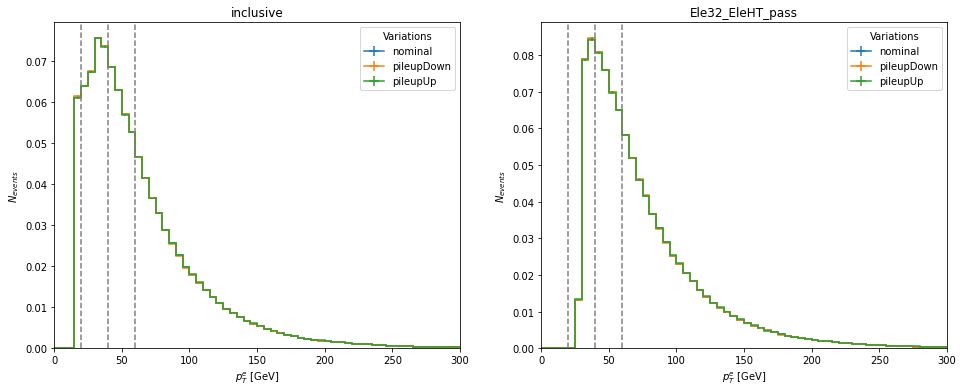

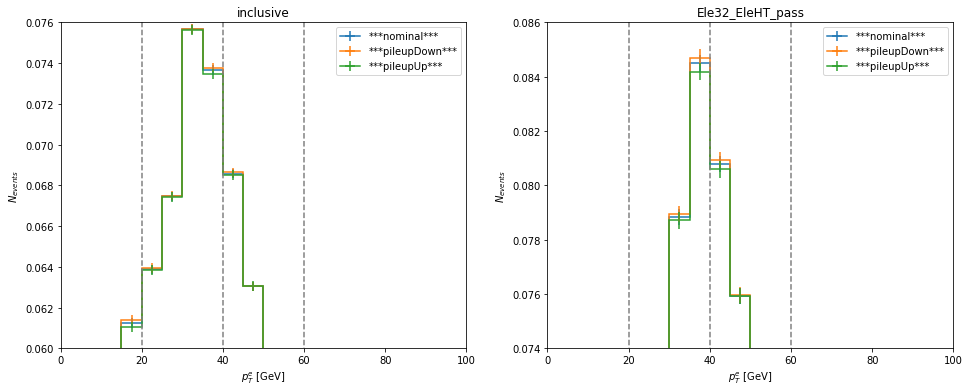

In [16]:
syst = 'pileup'

fig, axes = plt.subplots(1,2, figsize=[16,6])
for (i, cat) in enumerate(['inclusive', 'Ele32_EleHT_pass']):
    ax = axes[i]
    plot.plot1d(h[datasets_mc].sum('sample')[cat].sum('cat', 'year')[:, get_variations(h_prof, syst)], density=True, ax=ax);
    #plot.plot1d(h['DATA'][:, cat].sum('cat', 'year', 'var'), density=True, clear=False, ax=ax)
    ax.set_title(cat)
    ax.vlines([20, 40, 60], 0, 0.09, linestyle='dashed', color='gray')
    ax.set_xlim(0, 300);
fig, axes = plt.subplots(1,2, figsize=[16,6])
ylim = {'inclusive' : (0.060, 0.076), 'Ele32_EleHT_pass' : (0.074, 0.086)}
for (i, cat) in enumerate(['inclusive', 'Ele32_EleHT_pass']):
    ax = axes[i]
    plot.plot1d(h[datasets_mc].sum('sample')[cat].sum('cat', 'year')[:, get_variations(h_prof, syst)], density=True, ax=ax);
    #plot.plot1d(h['DATA'][:, cat].sum('cat', 'year', 'var'), density=True, clear=False, ax=ax)
    ax.set_title(cat)
    ax.vlines([20, 40, 60], 0, 0.09, linestyle='dashed', color='gray')
    ax.set_xlim(0, 100);
    ax.set_ylim(*ylim[cat])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [f"***{l}***" for l in labels]);

In [9]:
h_prof[:, 'nominal'].identifiers('var')

[<StringBin (nominal) instance at 0x7f4738a024c0>]

In [10]:
'var' in h.sparse_axes()

True

In [11]:
h_prof[:, ['sf_ele_idUp', 'sf_ele_idDown']].identifiers('var')
#h.identifiers('pt')

[<StringBin (sf_ele_idDown) instance at 0x7f468c0cb040>,
 <StringBin (sf_ele_idUp) instance at 0x7f4738a02fa0>]

In [12]:
h_prof.identifiers('var')

[<StringBin (nominal) instance at 0x7f4738a024c0>,
 <StringBin (pileupDown) instance at 0x7f4738a02e50>,
 <StringBin (pileupUp) instance at 0x7f4738a02e20>,
 <StringBin (sf_ele_idDown) instance at 0x7f468c0cb040>,
 <StringBin (sf_ele_idUp) instance at 0x7f4738a02fa0>,
 <StringBin (sf_ele_recoDown) instance at 0x7f4738a02c10>,
 <StringBin (sf_ele_recoUp) instance at 0x7f4738a02bb0>]

In [15]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f"***{l}***" for l in labels])
plt.show()

([<matplotlib.patches.Rectangle at 0x7f4682175a60>], ['histo'])

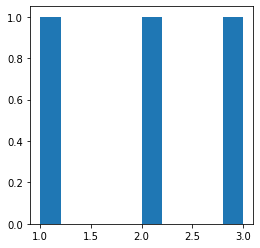

In [21]:
fig, ax = plt.subplots(1,1, figsize=[4,4])
plt.hist(np.array([1,2,3]), label='histo');
ax.get_legend_handles_labels()

In [27]:
b = False
for item in [1,2,3] if b is not True else [0,0,0]:
    print(item)

1
2
3


In [29]:
h.sparse_axes()

[<Cat (name=sample) instance at 0x7f4738a02cd0>,
 <Cat (name=cat) instance at 0x7f4738a02a30>,
 <Cat (name=year) instance at 0x7f4738a028b0>,
 <Cat (name=var) instance at 0x7f4738a024f0>]

In [32]:
axis = h.axis('pt')
axis

<Bin (name=pt) instance at 0x7f468c0e66d0>

In [38]:
axes = h.axes()
axes

(<Cat (name=sample) instance at 0x7f4738a02cd0>,
 <Cat (name=cat) instance at 0x7f4738a02a30>,
 <Cat (name=year) instance at 0x7f4738a028b0>,
 <Bin (name=pt) instance at 0x7f468c0e66d0>,
 <Cat (name=var) instance at 0x7f4738a024f0>)

In [52]:
axis == h.dense_axes()[0]

True

In [60]:
h._isparse('cat')

1